In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os 

#set working directory
os.chdir('C:/Users/simran.chhabra1/Desktop/extras/personal/Edwisor projects/Cab rental')

In [3]:
#check current working directory
os.getcwd()

'C:\\Users\\simran.chhabra1\\Desktop\\extras\\personal\\Edwisor projects\\Cab rental'

In [56]:
#read train and test data
train = pd.read_csv('train_cab/train_cab.csv')
test = pd.read_csv('test/test.csv')


In [46]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [4]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [90]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


### 1) Knowing the data

In [4]:
type(train['fare_amount'][0])

str

In [57]:
#Type of fare is string. It needs to be converted to numeric for further usage
train['fare_amount'] = pd.to_numeric(train['fare_amount'], errors='coerce_numeric')
#There were non-numeric amounts like 430- which were converted to NaN using coerce_numeric. NaN values will be filled in later.

In [58]:
#Negative values of fare are not possible thus were converted to NaN
train.loc[train['fare_amount']<0, 'fare_amount'] = np.nan

In [59]:
#Less than 1 and greater than 6 passengers cannot travel at a time thus converted such passenger_count to NaN
train.loc[(train['passenger_count']<1) | (train['passenger_count']>6),'passenger_count'] = np.nan

In [121]:
train[train['passenger_count'].isna()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
31,22.54,2015-06-21 21:46:34 UTC,-74.010483,40.717667,-73.985771,40.660366,NaN
64,7.30,2011-11-07 10:47:40 UTC,-74.003919,40.753019,-73.992368,40.735362,NaN
82,8.50,2013-06-14 08:27:43 UTC,-73.953710,40.790813,-73.957015,40.777676,NaN
97,9.00,2014-12-07 12:26:00 UTC,-73.984977,40.752122,-74.000925,40.757982,NaN
112,35.00,2012-12-06 18:05:00 UTC,-73.953310,40.787772,-73.944352,40.719772,NaN
133,10.50,2012-02-03 13:46:35 UTC,-73.988006,40.737723,-73.965699,40.766095,NaN
150,17.30,2010-05-17 07:44:00 UTC,-73.950972,40.785633,-74.010240,40.720302,NaN
174,10.50,2015-02-27 07:50:56 UTC,-73.944023,40.775959,-73.955048,40.785080,NaN
195,16.00,2014-02-05 00:28:00 UTC,-73.996652,40.744495,-73.980253,40.737635,NaN
203,11.30,2012-04-25 20:39:00 UTC,-73.993973,40.746577,-74.005060,40.709365,NaN


In [30]:
train.describe()

,fare_amount,passenger_count,distance_travelled
count,16066.000000,16066.000000,16066.000000
mean,15.018556,1.644299,16.026479
std,430.139215,1.262048,324.814489
min,0.000000,1.000000,0.000000
25%,6.000000,1.000000,1.214645
50%,8.500000,1.000000,2.125121
75%,12.500000,2.000000,3.847247
max,54343.000000,6.000000,8667.542104


In [8]:
train.isna().sum()/train.shape[0]*100
#Variables 'fare_amount' and 'passenger_count' have less than 30% missing values therefore can be filled 

fare_amount          0.174270
pickup_datetime      0.000000
pickup_longitude     0.000000
pickup_latitude      0.000000
dropoff_longitude    0.000000
dropoff_latitude     0.000000
passenger_count      0.827784
dtype: float64

### 2) Feature selection

In [60]:
# Fare depends on the distance travelled rather than latitude and longitude values.Below, I am creating a new variable distance_travelled in kms.

from math import radians, cos, sin, asin, sqrt

#function to compute distance using latitude and longitude values
def haversine(lon1, lat1, lon2, lat2):
  # convert decimal degrees to radians 
  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
  # haversine formula 
  dlon = lon2 - lon1 
  dlat = lat2 - lat1 
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  c = 2 * asin(sqrt(a)) 
  r = 6371 # Radius of earth in kilometers.
  return c * r

train['distance_travelled'] = train.apply(lambda x: haversine(x.pickup_longitude,x.pickup_latitude,x.dropoff_longitude,x.dropoff_latitude), axis=1)

In [61]:
#Create new variables date and time from pickup_datetime.There was one value in datetime '43' which was taken as NaN using function try and error. 
from datetime import datetime

def convertDatetimeToDate(x):
    try:
        return datetime.strptime(x, "%Y-%m-%d %H:%M:%S UTC").date()
    except ValueError as ve:
        return np.nan
        print('ValueError Raised:', ve)
    
def convertDatetimeToTime(x):
    try:
        return datetime.strptime(x, "%Y-%m-%d %H:%M:%S UTC").time()
    except ValueError as ve:
        return np.nan
        print('ValueError Raised:', ve)

train['Date'] = train['pickup_datetime'].apply(convertDatetimeToDate)
train['Time'] = train['pickup_datetime'].apply(convertDatetimeToTime)

In [62]:
#We can remove the columns 'pickup_datetime', pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'
train.drop(['pickup_datetime', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1, inplace=True)

### 2) Fill missing values

In [63]:
#filling missing values in passenger count using mode
train.loc[train["passenger_count"].isna(), 'passenger_count'] = train["passenger_count"].mode()[0]

In [64]:
#mean to compute null fare_amount
train.loc[train["fare_amount"].isna(), 'fare_amount'] = train["fare_amount"].mean()

In [65]:
#Since there is only one row with missing Date and Time values, we can drop it harmlessly.
train.dropna(inplace=True)

### 3) Detect Outliers


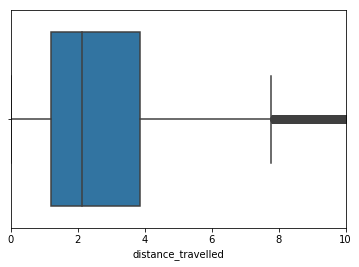

In [39]:
plt.xlim(0,10)
sns.boxplot(x=train['distance_travelled'])

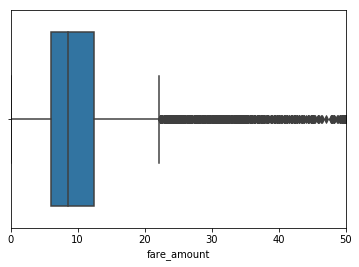

In [66]:
plt.xlim(0,50)
sns.boxplot(x=train['fare_amount'])

In [68]:
cnames = ['fare_amount', 'distance_travelled']

In [69]:
for i in cnames:
    q75, q25 = np.percentile(train.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-(iqr*1.5)
    max = q75+(iqr*1.5)
    train = train.drop(train[train.loc[:,i] < min].index)
    train = train.drop(train[train.loc[:,i] > max].index)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13562 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount           13562 non-null float64
passenger_count       13562 non-null float64
distance_travelled    13562 non-null float64
Year                  13562 non-null int64
Month                 13562 non-null int64
Day                   13562 non-null int64
Hour                  13562 non-null int64
dtypes: float64(3), int64(4)
memory usage: 847.6 KB


In [52]:
train.describe(include='all' )

,fare_amount,passenger_count,distance_travelled,Year,Month,Day,Hour
count,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000,13562.000000
mean,8.221514,1.640636,2.109054,2011.691638,6.220395,15.700487,13.653222
std,3.326171,1.263408,1.328814,1.860254,3.455686,8.669022,6.402336
min,0.000000,1.000000,0.000000,2009.000000,1.000000,1.000000,0.000000
25%,5.700000,1.000000,1.115916,2010.000000,3.000000,8.000000,9.000000
50%,7.500000,1.000000,1.823618,2012.000000,6.000000,16.000000,14.000000
75%,10.100000,2.000000,2.892964,2013.000000,9.000000,23.000000,19.000000
max,18.900000,6.000000,5.916023,2015.000000,12.000000,31.000000,23.000000


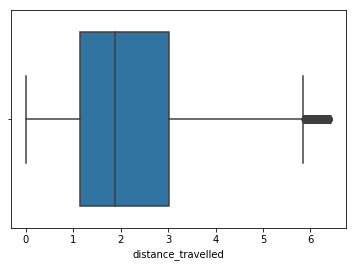

In [70]:
sns.boxplot(x=train['distance_travelled'])

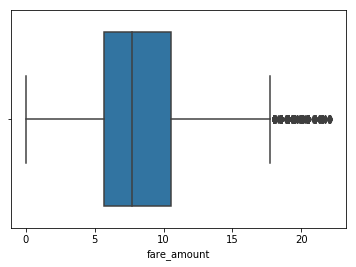

In [71]:
sns.boxplot(x=train['fare_amount'])

### 4) Checking dependency of variables on each other

In [46]:
train['Year'] = train['Date'].apply(lambda x: x.year)
train['Month'] = train['Date'].apply(lambda x: x.month)
train['Day'] = train['Date'].apply(lambda x: x.day)
train['Hour'] = train['Time'].apply(lambda x: x.hour)

In [47]:
train.drop(['Date','Time'], axis=1, inplace=True)

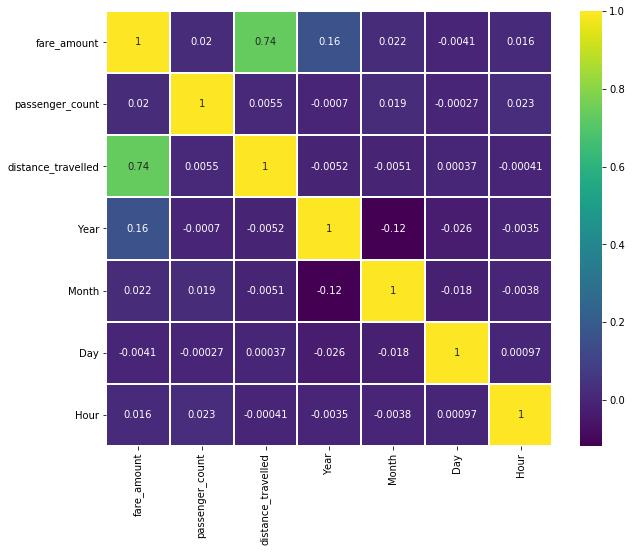

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(data=train.corr(), cmap='viridis', linewidth=1, linecolor='white', annot=True)

#Finding: As expected, fare does not depend on the number of passenger. It depends the most on distance travelled.

Text(0.5,1,'No. of cabs booked every hour starting from midnight')

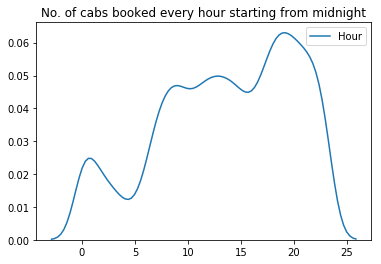

In [63]:
sns.kdeplot(train['Hour'])
plt.title("No. of cabs booked every hour starting from midnight")

#Finding: Peek hours of cab booking is evening between 6-8

Text(0.5,1,'No. of cabs booked every month')

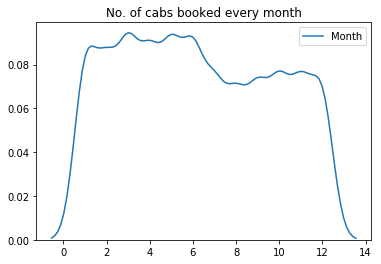

In [64]:
sns.kdeplot(train['Month'])
plt.title("No. of cabs booked every month")

#Finding: More cabs are booked in the months 1-6 than in 7-12

Text(0.5,1,'No. of cabs booked on different dates')

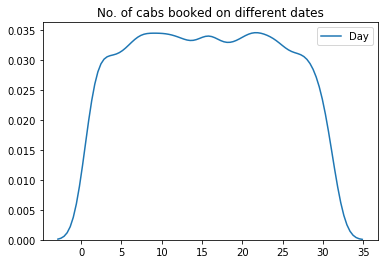

In [66]:
sns.kdeplot(train['Day'])
plt.title("No. of cabs booked on different dates")

#Finding: Cab booking does not depend on what day of the month it is

Text(0.5,1,'Fare charged at every hour starting from midnight')

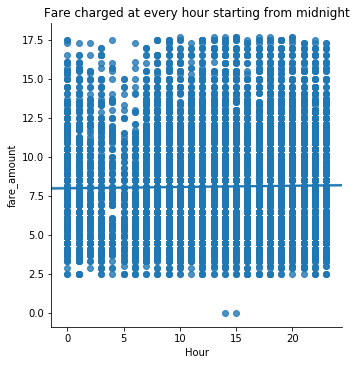

In [70]:
sns.lmplot(x='Hour',y='fare_amount',data=train)
plt.title("Fare charged at every hour starting from midnight")

#Finding: Fares are almost independent of the time of travel

Text(0.5,1,'Fare charged according to month')

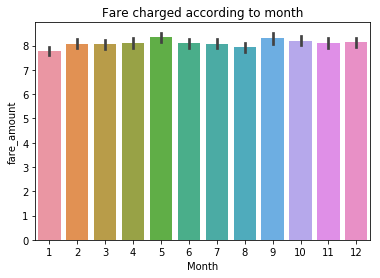

In [72]:
sns.barplot(x='Month',y='fare_amount',data=train)
plt.title("Fare charged according to month")

#Finding: Fares are almost independent of the month

Text(0.5,1,'Fare charged according to distance')

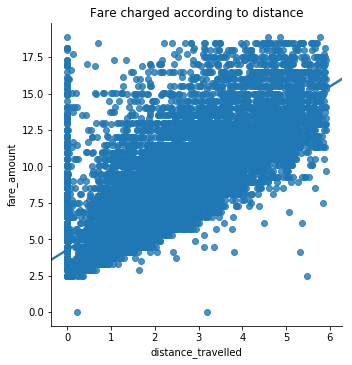

In [53]:
sns.lmplot(x='distance_travelled',y='fare_amount',data=train)
plt.title("Fare charged according to distance")

#Fares are linearly dependent on distance travelled

Text(0.5,1,'Fare charged according to year')

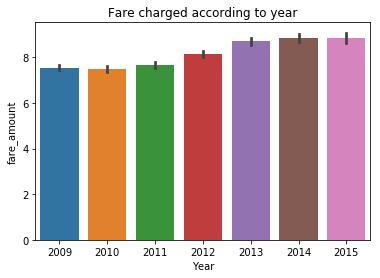

In [69]:
sns.barplot(x='Year',y='fare_amount',data=train)
plt.title("Fare charged according to year")

#Finding: Fares have increased over the past years

In [54]:
train.describe()

,fare_amount,passenger_count,distance_travelled,Year,Month,Day,Hour
count,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000,13357.000000
mean,8.100327,1.640885,2.064117,2011.685483,6.220034,15.700981,13.657183
std,3.188325,1.263973,1.278863,1.859785,3.457485,8.663918,6.392681
min,0.000000,1.000000,0.000000,2009.000000,1.000000,1.000000,0.000000
25%,5.700000,1.000000,1.106015,2010.000000,3.000000,8.000000,9.000000
50%,7.500000,1.000000,1.801966,2012.000000,6.000000,16.000000,14.000000
75%,10.100000,2.000000,2.835344,2013.000000,9.000000,23.000000,19.000000
max,17.700000,6.000000,5.652882,2015.000000,12.000000,31.000000,23.000000


### Machine Learning Algorithms

In [56]:
from sklearn.model_selection import train_test_split

X = train.drop(['fare_amount'], axis=1)
y = train['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [59]:
#Linear Regression


from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train, y_train)
pred = lm.predict(X_test)

mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred)**0.5
r2 = r2_score(y_test, pred)

print("mae: ", mae)
print("rmse: ", rmse)
print("r2-score: ", r2)

mae:  1.4959133832533822
rmse:  2.0674895262298603
r2-score:  0.5830821141595637


In [60]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred)**0.5
r2 = r2_score(y_test, pred)

print("mae: ", mae)
print("rmse: ", rmse)
print("r2-score: ", r2)

C:\Users\simran.chhabra1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mae:  1.5284590490133887
rmse:  2.1062942618410605
r2-score:  0.5672849705161713


In [61]:
#KNeighbors Regressor

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred)**0.5
r2 = r2_score(y_test, pred)

print("mae: ", mae)
print("rmse: ", rmse)
print("r2-score: ", r2)

mae:  1.5831608523709484
rmse:  2.171977162032113
r2-score:  0.539876516168682


### Conclusion: Linear regeressor is preferred as it gives minimum error and maximum R2 score

In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [85]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [73]:
test.loc[(test['passenger_count']<1) | (test['passenger_count']>6),'passenger_count'] = np.nan

test['distance_travelled'] = test.apply(lambda x: haversine(x.pickup_longitude,x.pickup_latitude,x.dropoff_longitude,x.dropoff_latitude), axis=1)
test['Date'] = test['pickup_datetime'].apply(convertDatetimeToDate)
test['Time'] = test['pickup_datetime'].apply(convertDatetimeToTime)

test.drop(['pickup_datetime', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1, inplace=True)

test.loc[test["passenger_count"].isna(), 'passenger_count'] = test["passenger_count"].mode()[0]

test.loc[test['distance_travelled']>4000] = np.nan

test.dropna(inplace=True)

test['Year'] = test['Date'].apply(lambda x: x.year)
test['Month'] = test['Date'].apply(lambda x: x.month)
test['Day'] = test['Date'].apply(lambda x: x.day)
test['Hour'] = test['Time'].apply(lambda x: x.hour)

test.drop(['Date','Time'], axis=1, inplace=True)


In [74]:
test = sc.fit_transform(test)

In [75]:
predictions = lm.predict(test)

In [76]:
predictions

array([ 8.11691172,  8.17710219,  6.28061   , ..., 18.41674534,
       11.72103274,  7.6237831 ])

In [77]:
output = pd.DataFrame({'fare_amount': predictions})
output.to_csv('predicted_fare.csv', index = True)